In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

In [15]:
iris = load_iris()
iris_frame = pd.DataFrame(data=np.c_[iris['data'], iris['target']],columns = iris['feature_names'] + ['target'])
iris_frame['target'] = iris_frame['target'].map({1:"versicolor",0:"setosa",2:"virginica"})
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Linear SVM

In [8]:
import matplotlib.colors as colors
linear_svm = svm.SVC(kernel = 'linear')

df1 = iris_frame[["sepal length (cm)","sepal width (cm)","target"]]
X= df1.iloc[:,0:2]
Y= df1.iloc[:,2].replace({'setosa' : 0,
                          'versicolor':1,
                          'virginica':2}).copy()
linear_svm.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

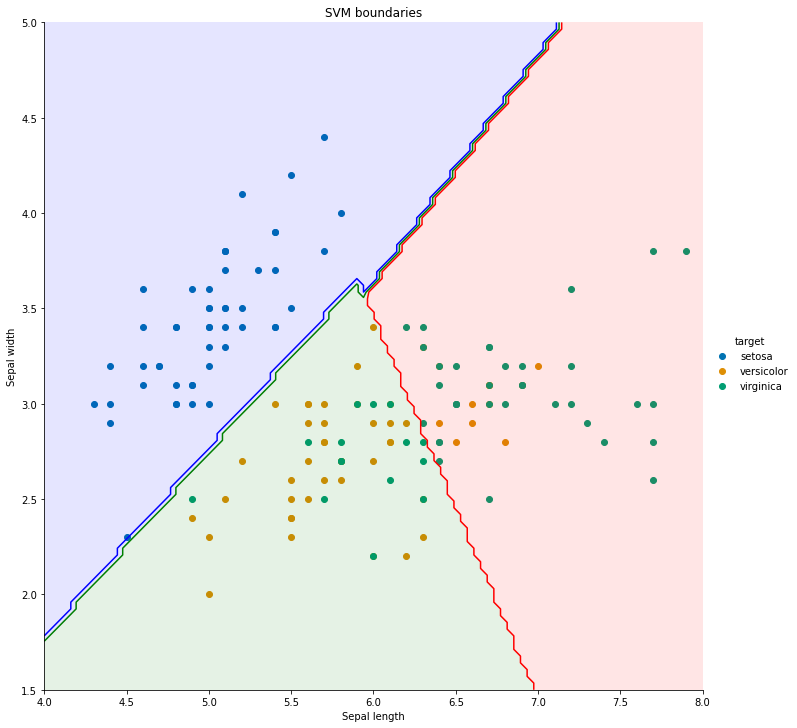

In [9]:
import seaborn as sn

N = 100
X_ = np.linspace(4,8, N)
Y_ = np.linspace(1.5,5, N)
X_,Y_=np.meshgrid(X_, Y_)
color_list = ["Blues, Greens, Reds"]
my_norm = colors.Normalize(vmin = -1, vmax = 1.)
g = sn.FacetGrid(iris_frame,hue = "target", 
                 height = 10, 
                 palette = "colorblind").map(plt.scatter, 
                                             "sepal length (cm)",
                                            "sepal width (cm)",).add_legend()

my_ax = g.ax
zz =  np.array( [linear_svm.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries')

plt.show()

# RBF Gaussian kernel

In [11]:
##커널 변경
rbf_svm = svm.SVC(kernel = 'rbf')
rbf_svm.fit(X,Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

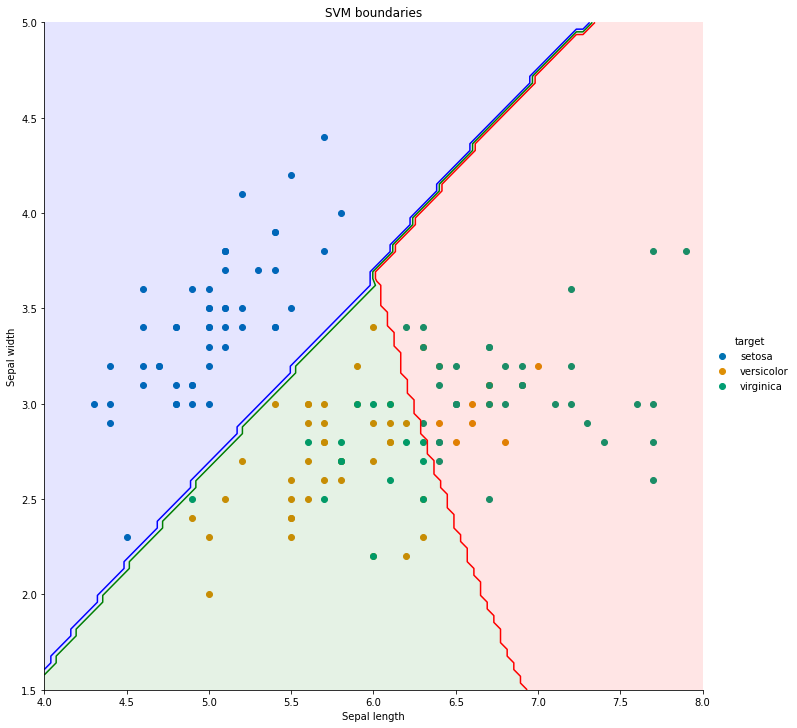

In [12]:
N = 100
X_ = np.linspace(4,8, N)
Y_ = np.linspace(1.5,5, N)
X_,Y_=np.meshgrid(X_, Y_)
color_list = ["Blues, Greens, Reds"]
my_norm = colors.Normalize(vmin = -1, vmax = 1.)
g = sn.FacetGrid(iris_frame,hue = "target", 
                 height= 10, 
                 palette = "colorblind").map(plt.scatter, 
                                             "sepal length (cm)",
                                            "sepal width (cm)",).add_legend()

my_ax = g.ax
zz =  np.array( [rbf_svm.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries')

plt.show()

# Sigmoid Kernel

In [13]:
sigmoid_svm = svm.SVC(kernel = 'sigmoid')
sigmoid_svm.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

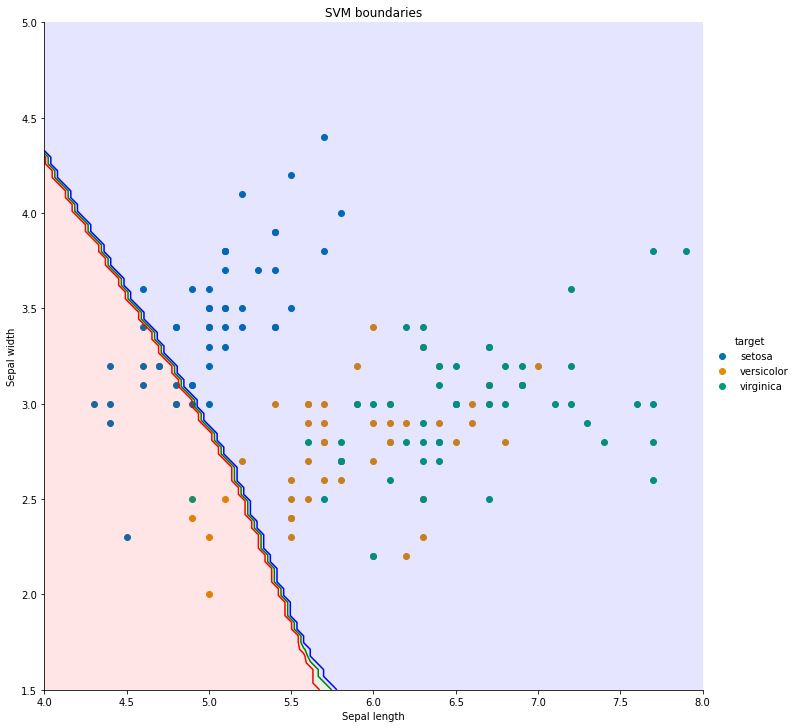

In [14]:
N = 100
X_ = np.linspace(4,8, N)
Y_ = np.linspace(1.5,5, N)
X_,Y_=np.meshgrid(X_, Y_)
color_list = ["Blues, Greens, Reds"]
my_norm = colors.Normalize(vmin = -1, vmax = 1.)
g = sn.FacetGrid(iris_frame,hue = "target", 
                 height= 10, 
                 palette = "colorblind").map(plt.scatter, 
                                             "sepal length (cm)",
                                            "sepal width (cm)",).add_legend()

my_ax = g.ax
zz =  np.array( [sigmoid_svm.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries')

plt.show()

# polynomial

In [22]:
polynomial_svm = svm.SVC(kernel = 'poly')
polynomial_svm.fit(X, Y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

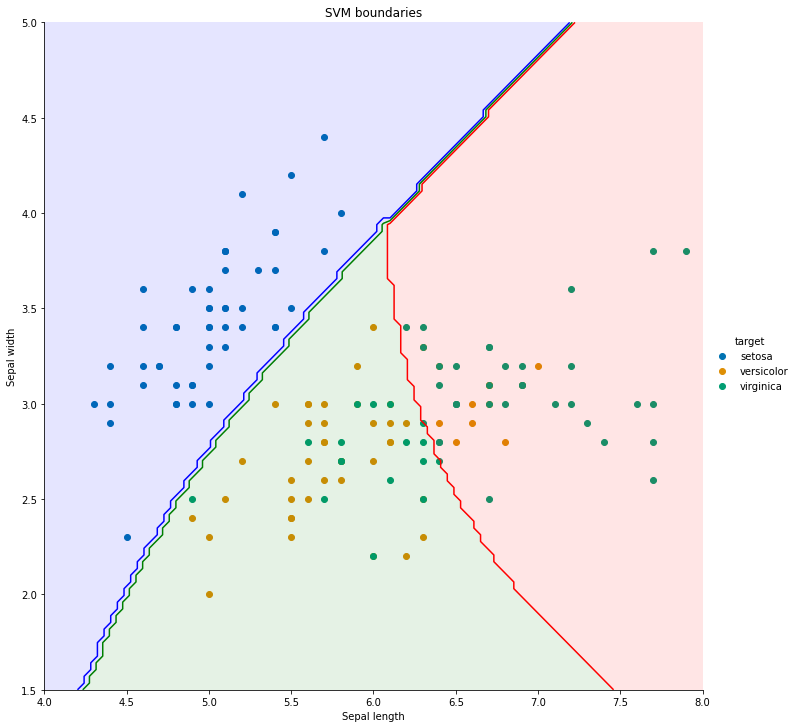

In [23]:
N = 100
X_ = np.linspace(4,8, N)
Y_ = np.linspace(1.5,5, N)
X_,Y_=np.meshgrid(X_, Y_)
color_list = ["Blues, Greens, Reds"]
my_norm = colors.Normalize(vmin = -1, vmax = 1.)
g = sn.FacetGrid(iris_frame,hue = "target", 
                 height= 10, 
                 palette = "colorblind").map(plt.scatter, 
                                             "sepal length (cm)",
                                            "sepal width (cm)",).add_legend()

my_ax = g.ax
zz =  np.array( [polynomial_svm.predict ([[xx,yy]]) [0] for xx,yy in zip(np.ravel(X_),np.ravel(Y_))])
Z = zz.reshape(X_.shape)
my_ax.contourf(X_,Y_,Z,2,alpha=.1, colors = ('blue','green','red'))
my_ax.contour(X_,Y_,Z,2,alpha=1, colors = ('blue','green','red'))

X_= np.linspace(4,8,N)
Y_= np.linspace(1.5,5,N)
X_,Y_= np.meshgrid(X_,Y_)

my_ax.set_xlabel('Sepal length')
my_ax.set_ylabel('Sepal width')
my_ax.set_title('SVM boundaries')

plt.show()